# Customer Segmentation and Personalized Marketing

The objective of this project is to analyze the e-commerce dataset and perform customer segmentation to identify distinct groups of customers. By understanding customer segments, I can develop personalized marketing strategies to enhance customer experience, increase engagement, and drive sales.

This data science project follows several steps:
1. Data Preprocessing:
    - Load the dataset and examine its structure.
    - Handle missing values, outliers, and data inconsistencies.
    - Explore the variables and understand their meaning and relevance to the project's objective.
2. Feature Engineering:
    - Create new features that might be useful for segmentation and marketing strategies.
3. Customer Segmentation:
    - Apply a suitable clustering algorithm (e.g., K-means, DBSCAN) to segment customers based on their purchase behavior.
    - Select appropriate features for clustering, such as total spent, purchase frequency, or time since last purchase.
    - Determine the optimal number of clusters using evaluation metrics like silhouette score or elbow method.
    - Visualize the resulting clusters to gain insights into different customer segments.
4. Customer Profiling:
    - Analyze the characteristics of each customer segment.
    - Identify key attributes that distinguish one segment from another.
    - Explore demographic information (if available) to gain deeper insights into each segment.
5. Personalized Marketing Strategies:
    - Develop personalized marketing strategies for each customer segment based on their characteristics.
    - Test the effectiveness of the personalized marketing strategies using A/B testing or other evaluation methods.
    - Monitor key performance metrics, such as conversion rate, click-through rate, or customer lifetime value, to measure the impact of the strategies.
6. Visualization and Reporting:
    - Create visualizations to present the findings and insights from the customer segmentation analysis.
    - Generate reports summarizing the customer segments, their characteristics, and the recommended marketing strategies.
    - Communicate the results effectively to stakeholders, such as marketing teams or business owners.

Dataset resource: https://www.kaggle.com/datasets/carrie1/ecommerce-data.

### Data Preprocessing

I started this project by importing some essential Python modules that were likely to be used later.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print(f'numpy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'matplotlib version: {mpl.__version__}')
print(f'seaborn version: {sns.__version__}')

file_path = 'datasets'

print(f'file path = {file_path}')

numpy version: 1.24.2
pandas version: 1.5.3
matplotlib version: 3.7.0
seaborn version: 0.12.2
file path = datasets


The original dataset is provided in one CSV file, "data.csv", so I stored the file content into a DataFrame named `df`.

In [2]:
df = pd.read_csv(os.path.join(file_path, 'data.csv'), encoding = "ISO-8859-1")

df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


There were 8 columns in `df`;
- `InvoiceNo` contains the ID number of the invoice completed by customers.
- `StockCode` contains the code of the stock where the product was ordered.
- `Description` is the description of the purchased product.
- `Quantity` is the number of products bought by the customers according to the invoice.
- `InvoiceDate` stores the date and time when the purchase was successful.
- `UnitPrice` is the cost of the product.
- `CustomerID` is the ID number of the customer who completed the invoice.
- `Country` is the country which the customer was located in.

There were some issues in `df`, which means `df` had to be preprocessed;
- `InvoiceDate` values' type was normal object, so I converted them into datetime object in order to make them more versatile.
- `Description` and `CustomerID` contained null values, so I had to fill them with "-".

In [4]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64')

type(df['InvoiceDate'].values[0])

numpy.datetime64

In [5]:
df = df.fillna('-')
df = df.sort_values(by=['InvoiceDate', 'InvoiceNo'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 37.2+ MB


Since all features are clean, I could move to the next part.

### Feature Engineering

In this part, I created some more features that are useful for further analysis. The most necessary feature I added was `TotalPrice`, which represents the total price of the purchased product. The value could be retrieved by multiplying the `Quantity` value with the `UnitPrice` value.

In [6]:
df['TotalPrice'] = df[['Quantity', 'UnitPrice']].apply(lambda x: x[0] * x[1], axis=1)

df[['Quantity', 'UnitPrice', 'TotalPrice']].head(5)

,Quantity,UnitPrice,TotalPrice
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


The process below is a special one. I exported the complete `df` into a new CSV file, `data_clean.csv`, to save it as a part of the preprocessed database.

In [7]:
df.to_csv(os.path.join(file_path, 'data_clean.csv'), index=False)
df = pd.read_csv(os.path.join(file_path, 'data_clean.csv'), encoding = "ISO-8859-1")

df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


I created a new table, `df_invoice`, to store unique invoices in each row. With this table, I can find the conversion rate and the average order values in each period. I determined the table to have 4 columns;
- `InvoiceNo` still is the ID number of the invoice. However, InvoiceNo, in this table, contains unique values. Think of it as a primary key.
- `TotalPrice` is the sum of the price spent in the invoice, which can be aggregated by using the sum of all `df`'s `TotalPrice` values in each invoice.
- `InvoiceDate` has the same meaning as appeared in `df`.
- `CustomerID` also has the same meaning as appeared in `df`.

In [8]:
total_price = df.groupby('InvoiceNo').sum()['TotalPrice']
df_invoice = pd.DataFrame({'InvoiceNo': total_price.keys(), 'TotalPrice': total_price.values})
df_invoice['InvoiceDate'] = df_invoice['InvoiceNo'].apply(lambda x: df[df['InvoiceNo'] == x]['InvoiceDate'].values[0])
df_invoice['CustomerID'] = df_invoice['InvoiceNo'].apply(lambda x: df[df['InvoiceNo'] == x]['CustomerID'].values[0])

df_invoice.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_14456\3708952557.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_price = df.groupby('InvoiceNo').sum()['TotalPrice']


,InvoiceNo,TotalPrice,InvoiceDate,CustomerID
0,536365,139.12,2010-12-01 08:26:00,17850.0
1,536366,22.20,2010-12-01 08:28:00,17850.0
2,536367,278.73,2010-12-01 08:34:00,13047.0
3,536368,70.05,2010-12-01 08:34:00,13047.0
4,536369,17.85,2010-12-01 08:35:00,13047.0


In [9]:
df_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25900 entries, 0 to 25899
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    25900 non-null  object 
 1   TotalPrice   25900 non-null  float64
 2   InvoiceDate  25900 non-null  object 
 3   CustomerID   25900 non-null  object 
dtypes: float64(1), object(3)
memory usage: 809.5+ KB


Like what I did to `df`, I exported `df_invoice` as `invoice_clean.csv`.

In [10]:
df_invoice.to_csv(os.path.join(file_path, 'invoice_clean.csv'), index=False)
df_invoice = pd.read_csv(os.path.join(file_path, 'invoice_clean.csv'), encoding = "ISO-8859-1")

df_invoice.head(5)

,InvoiceNo,TotalPrice,InvoiceDate,CustomerID
0,536365,139.12,2010-12-01 08:26:00,17850.0
1,536366,22.20,2010-12-01 08:28:00,17850.0
2,536367,278.73,2010-12-01 08:34:00,13047.0
3,536368,70.05,2010-12-01 08:34:00,13047.0
4,536369,17.85,2010-12-01 08:35:00,13047.0


Besides `df_invoice`, I created another table named `df_customer` to store unique customer ID, like what `df_invoice` does to the invoice entity. The table was defined to have 8 columns.

- `CustomerID` acts as the only primary key of the table by storing unique customers by their ID numbers.
- `Country` is the country where the customer is in.
- `ShoppingTimes` is the number of invoices made by the customer. It also implies how frequent the customer buys things in the store.
- `FirstTimeShopping` is the date when the customer firstly made a purchase.
- `RecentTimeShopping` is the most recent date when the customer made a purchase.
- `ShoppingItems` is the number of total unique items the customer buys.
- `ShoppingQuantity` is the number of all things bought by the customer.
- `Price` is the total money the customer spent on all purchases.

In [11]:
df_customer = pd.DataFrame(df[['CustomerID', 'Country']].drop_duplicates(), columns=['CustomerID', 'Country']).reset_index().drop('index', axis=1)
df_customer = df_customer.drop(df_customer[df_customer['CustomerID'] == '-'].index)

df_customer[df_customer['CustomerID'] == '-']

,CustomerID,Country


In [12]:
df_customer['ShoppingTimes'] = df_customer['CustomerID'].apply(lambda x: df[df['CustomerID'] == x]['InvoiceNo'].nunique())
df_customer['FirstTimeShopping'] = df_customer['CustomerID'].apply(lambda x: df[df['CustomerID'] == x]['InvoiceDate'].values[0])
df_customer['RecentTimeShopping'] = df_customer['CustomerID'].apply(lambda x: df[df['CustomerID'] == x]['InvoiceDate'].values[-1])
df_customer['ShoppingItems'] = df_customer['CustomerID'].apply(lambda x: len(df[df['CustomerID'] == x]['InvoiceNo']))
df_customer['ShoppingQuantity'] = df_customer['CustomerID'].apply(lambda x: df[df['CustomerID'] == x]['Quantity'].sum())
df_customer['Price'] = df_customer['CustomerID'].apply(lambda x: np.round(df[df['CustomerID'] == x]['TotalPrice'].sum(), 2))

df_customer.head(5)

,CustomerID,Country,ShoppingTimes,FirstTimeShopping,RecentTimeShopping,ShoppingItems,ShoppingQuantity,Price
0,17850.0,United Kingdom,35,2010-12-01 08:26:00,2011-02-10 14:38:00,312,1693,5288.63
1,13047.0,United Kingdom,18,2010-12-01 08:34:00,2011-11-08 12:10:00,196,1355,3079.10
2,12583.0,France,18,2010-12-01 08:45:00,2011-12-07 08:07:00,251,5009,7187.34
3,13748.0,United Kingdom,5,2010-12-01 09:00:00,2011-09-05 09:45:00,28,439,948.25
4,15100.0,United Kingdom,6,2010-12-01 09:09:00,2011-01-13 17:09:00,6,58,635.10


I deleted all customers who spent the negative money since I aim for only the customers who did make a purchase in the normal case.

In [13]:
df_customer = df_customer.drop(df_customer[df_customer['Price'] < 0].index)

df_customer[df_customer['Price'] < 0]

,CustomerID,Country,ShoppingTimes,FirstTimeShopping,RecentTimeShopping,ShoppingItems,ShoppingQuantity,Price


In [14]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4388
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          4339 non-null   object 
 1   Country             4339 non-null   object 
 2   ShoppingTimes       4339 non-null   int64  
 3   FirstTimeShopping   4339 non-null   object 
 4   RecentTimeShopping  4339 non-null   object 
 5   ShoppingItems       4339 non-null   int64  
 6   ShoppingQuantity    4339 non-null   int64  
 7   Price               4339 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 305.1+ KB


In [15]:
df_customer.describe()

,ShoppingTimes,ShoppingItems,ShoppingQuantity,Price
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,5.113621,93.929246,1134.072367,1921.421274
std,9.370640,233.216521,4689.317335,8247.817146
min,1.000000,1.000000,-189.000000,0.000000
25%,1.000000,18.000000,158.000000,301.160000
50%,3.000000,42.000000,373.000000,657.300000
75%,6.000000,102.000000,978.500000,1627.625000
max,248.000000,7983.000000,196719.000000,279489.020000


According to the DataFrame's description, the standard deviation of every quantitative value is even larger than its mean. Hence, data interpretation by using mean isn't likely to be fair, so I use the median to take a brief observation for now. The median, or the 50th percentile, of `ShoppingItems` is 3 times, and the median of `Price` is 657.3. Those two variables are interesting to find some more insights since they contain features that most stores would generally like to increase.

Next, I divided customers into 5 groups by the `RecentTimeShoppping` value in ascending order to evaluate using R-score. R-score lets us infer how recent the customers make a purchase. Customers who visited the store most lately will get the most score. As a result, the customers group that are in group 5 visited the store most recently, so they get 5 scores, which is the full score, and it goes in this patterns in other groups.

In [56]:
date_range = [int(date.split(' ')[0].replace('-', '')) for date in df_customer['RecentTimeShopping'].unique()]

def date_to_score(date):
    date_int = int(date.split(' ')[0].replace('-', ''))
    for i in range(1, 6):
        if date_int <= np.percentile(date_range, 20 * i):
            return i

df_customer['RScore'] = df_customer['RecentTimeShopping'].apply(lambda x: date_to_score(x))

df_customer['RScore'].value_counts()

4    921
2    868
3    857
1    849
5    844
Name: RScore, dtype: int64

I then divided customers into 5 groups by the `ShopppingTimes` value in ascending order to evaluate using F-score. F-score lets us infer how frequent the customers make a purchase. Customers who visit the store most often will get the most score. As a result, the customers group that are in group 5 visit the store most often, so they get 5 scores, which is the full score, and it goes in this patterns in other groups.

In [57]:
time_range = df_customer['ShoppingTimes'].unique()

def time_to_score(time):
    for i in range(1, 6):
        if time <= np.percentile(time_range, 20 * i):
            return i

df_customer['FScore'] = df_customer['ShoppingTimes'].apply(lambda x: time_to_score(x))

df_customer['FScore'].value_counts()

1    4030
2     216
3      55
4      24
5      14
Name: FScore, dtype: int64

After that, I divided customers into 5 groups by the `Price` value in ascending order to evaluate using M-score. M-score tells us how much money in total that the customers make a purchase. Customers who pay most to the store will get the most score. As a result, the customers group that are in group 5 pay most money to the store, so they get 5 scores, which is the full score, and it goes in this patterns in other groups.

In [58]:
price_range = df_customer['Price'].unique()

def price_to_score(price):
    for i in range(1, 6):
        if price <= np.percentile(price_range, 20 * i):
            return i

df_customer['MScore'] = df_customer['Price'].apply(lambda x: price_to_score(x))

df_customer['MScore'].value_counts()

1    916
2    865
3    857
5    851
4    850
Name: MScore, dtype: int64

I combined F-score and M-score because they are assumed to have a correlation with each other, so I could reduce both dimensions into one. FM-score is the output from both scores, which is calculated by the half of the multiplication of both scores.

In [59]:
df_customer['FMScore'] = df_customer[['FScore', 'MScore']].apply(lambda x: ((x[0] * x[1]) / 25) * 5, axis=1)

df_customer.head(5)

,CustomerID,Country,ShoppingTimes,FirstTimeShopping,RecentTimeShopping,ShoppingItems,ShoppingQuantity,Price,RScore,FScore,MScore,FMScore
0,17850.0,United Kingdom,35,2010-12-01 08:26:00,2011-02-10 14:38:00,312,1693,5288.63,1,3,5,3.0
1,13047.0,United Kingdom,18,2010-12-01 08:34:00,2011-11-08 12:10:00,196,1355,3079.10,4,2,5,2.0
2,12583.0,France,18,2010-12-01 08:45:00,2011-12-07 08:07:00,251,5009,7187.34,5,2,5,2.0
3,13748.0,United Kingdom,5,2010-12-01 09:00:00,2011-09-05 09:45:00,28,439,948.25,2,1,3,0.6
4,15100.0,United Kingdom,6,2010-12-01 09:09:00,2011-01-13 17:09:00,6,58,635.10,1,1,3,0.6


Like what I did to `df` and `df_invoice`, I exported `df_customer` as `customer_clean.csv`.

In [36]:
df_customer.to_csv(os.path.join(file_path, 'customer_clean.csv'), index=False)
df_customer = pd.read_csv(os.path.join(file_path, 'customer_clean.csv'), encoding = "ISO-8859-1")

df_customer.head(5)

,CustomerID,Country,ShoppingTimes,FirstTimeShopping,RecentTimeShopping,ShoppingItems,ShoppingQuantity,Price,RScore,FScore,MScore,FMScore
0,17850.0,United Kingdom,35,2010-12-01 08:26:00,2011-02-10 14:38:00,312,1693,5288.63,1,3,5,3.0
1,13047.0,United Kingdom,18,2010-12-01 08:34:00,2011-11-08 12:10:00,196,1355,3079.10,4,2,5,2.0
2,12583.0,France,18,2010-12-01 08:45:00,2011-12-07 08:07:00,251,5009,7187.34,5,2,5,2.0
3,13748.0,United Kingdom,5,2010-12-01 09:00:00,2011-09-05 09:45:00,28,439,948.25,2,1,3,0.6
4,15100.0,United Kingdom,6,2010-12-01 09:09:00,2011-01-13 17:09:00,6,58,635.10,1,1,3,0.6


Visualization: https://public.tableau.com/app/profile/komsan.kongwongsupak/viz/customer-segmentation/Story1?publish=yes

### Customer Segmentation

Based on my research, there are 4 main existing approaches for clustering the unsupervised data; K-Means, Hierarchical Clustering, Gaussian Mixture, and DBSCAN. Thus, in this part, I tried all 4 clustering algorithms to find out which one works best for this dataset.

In [37]:
df_customer['DaysSinceRecent'] = df_customer['RecentTimeShopping'].apply(lambda x: (pd.Timestamp('2012-01-01 00:00:00') - pd.Timestamp(x)).days)

df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          4339 non-null   float64
 1   Country             4339 non-null   object 
 2   ShoppingTimes       4339 non-null   int64  
 3   FirstTimeShopping   4339 non-null   object 
 4   RecentTimeShopping  4339 non-null   object 
 5   ShoppingItems       4339 non-null   int64  
 6   ShoppingQuantity    4339 non-null   int64  
 7   Price               4339 non-null   float64
 8   RScore              4339 non-null   int64  
 9   FScore              4339 non-null   int64  
 10  MScore              4339 non-null   int64  
 11  FMScore             4339 non-null   float64
 12  DaysSinceRecent     4339 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 440.8+ KB


In [103]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

X = df_customer[['DaysSinceRecent', 'ShoppingTimes', 'Price']]

X_km = X.copy()
y_km = KMeans(n_clusters=5, init='random', n_init=10, max_iter=1000).fit(X_km)
X_km['Group'] = y_km.labels_

X_hc = X.copy()
y_hc = AgglomerativeClustering(n_clusters=5).fit(X_hc)
X_hc['Group'] = y_hc.labels_

X_gm = X.copy()
y_gm = GaussianMixture(n_components=5, n_init=10, max_iter=1000).fit_predict(X_gm)
X_gm['Group'] = y_gm

X_dbscan = X.copy()
y_dbscan = DBSCAN(eps = 3.7, min_samples=5).fit(X_dbscan)
X_dbscan['Group'] = [y + 1 for y in y_dbscan.labels_]

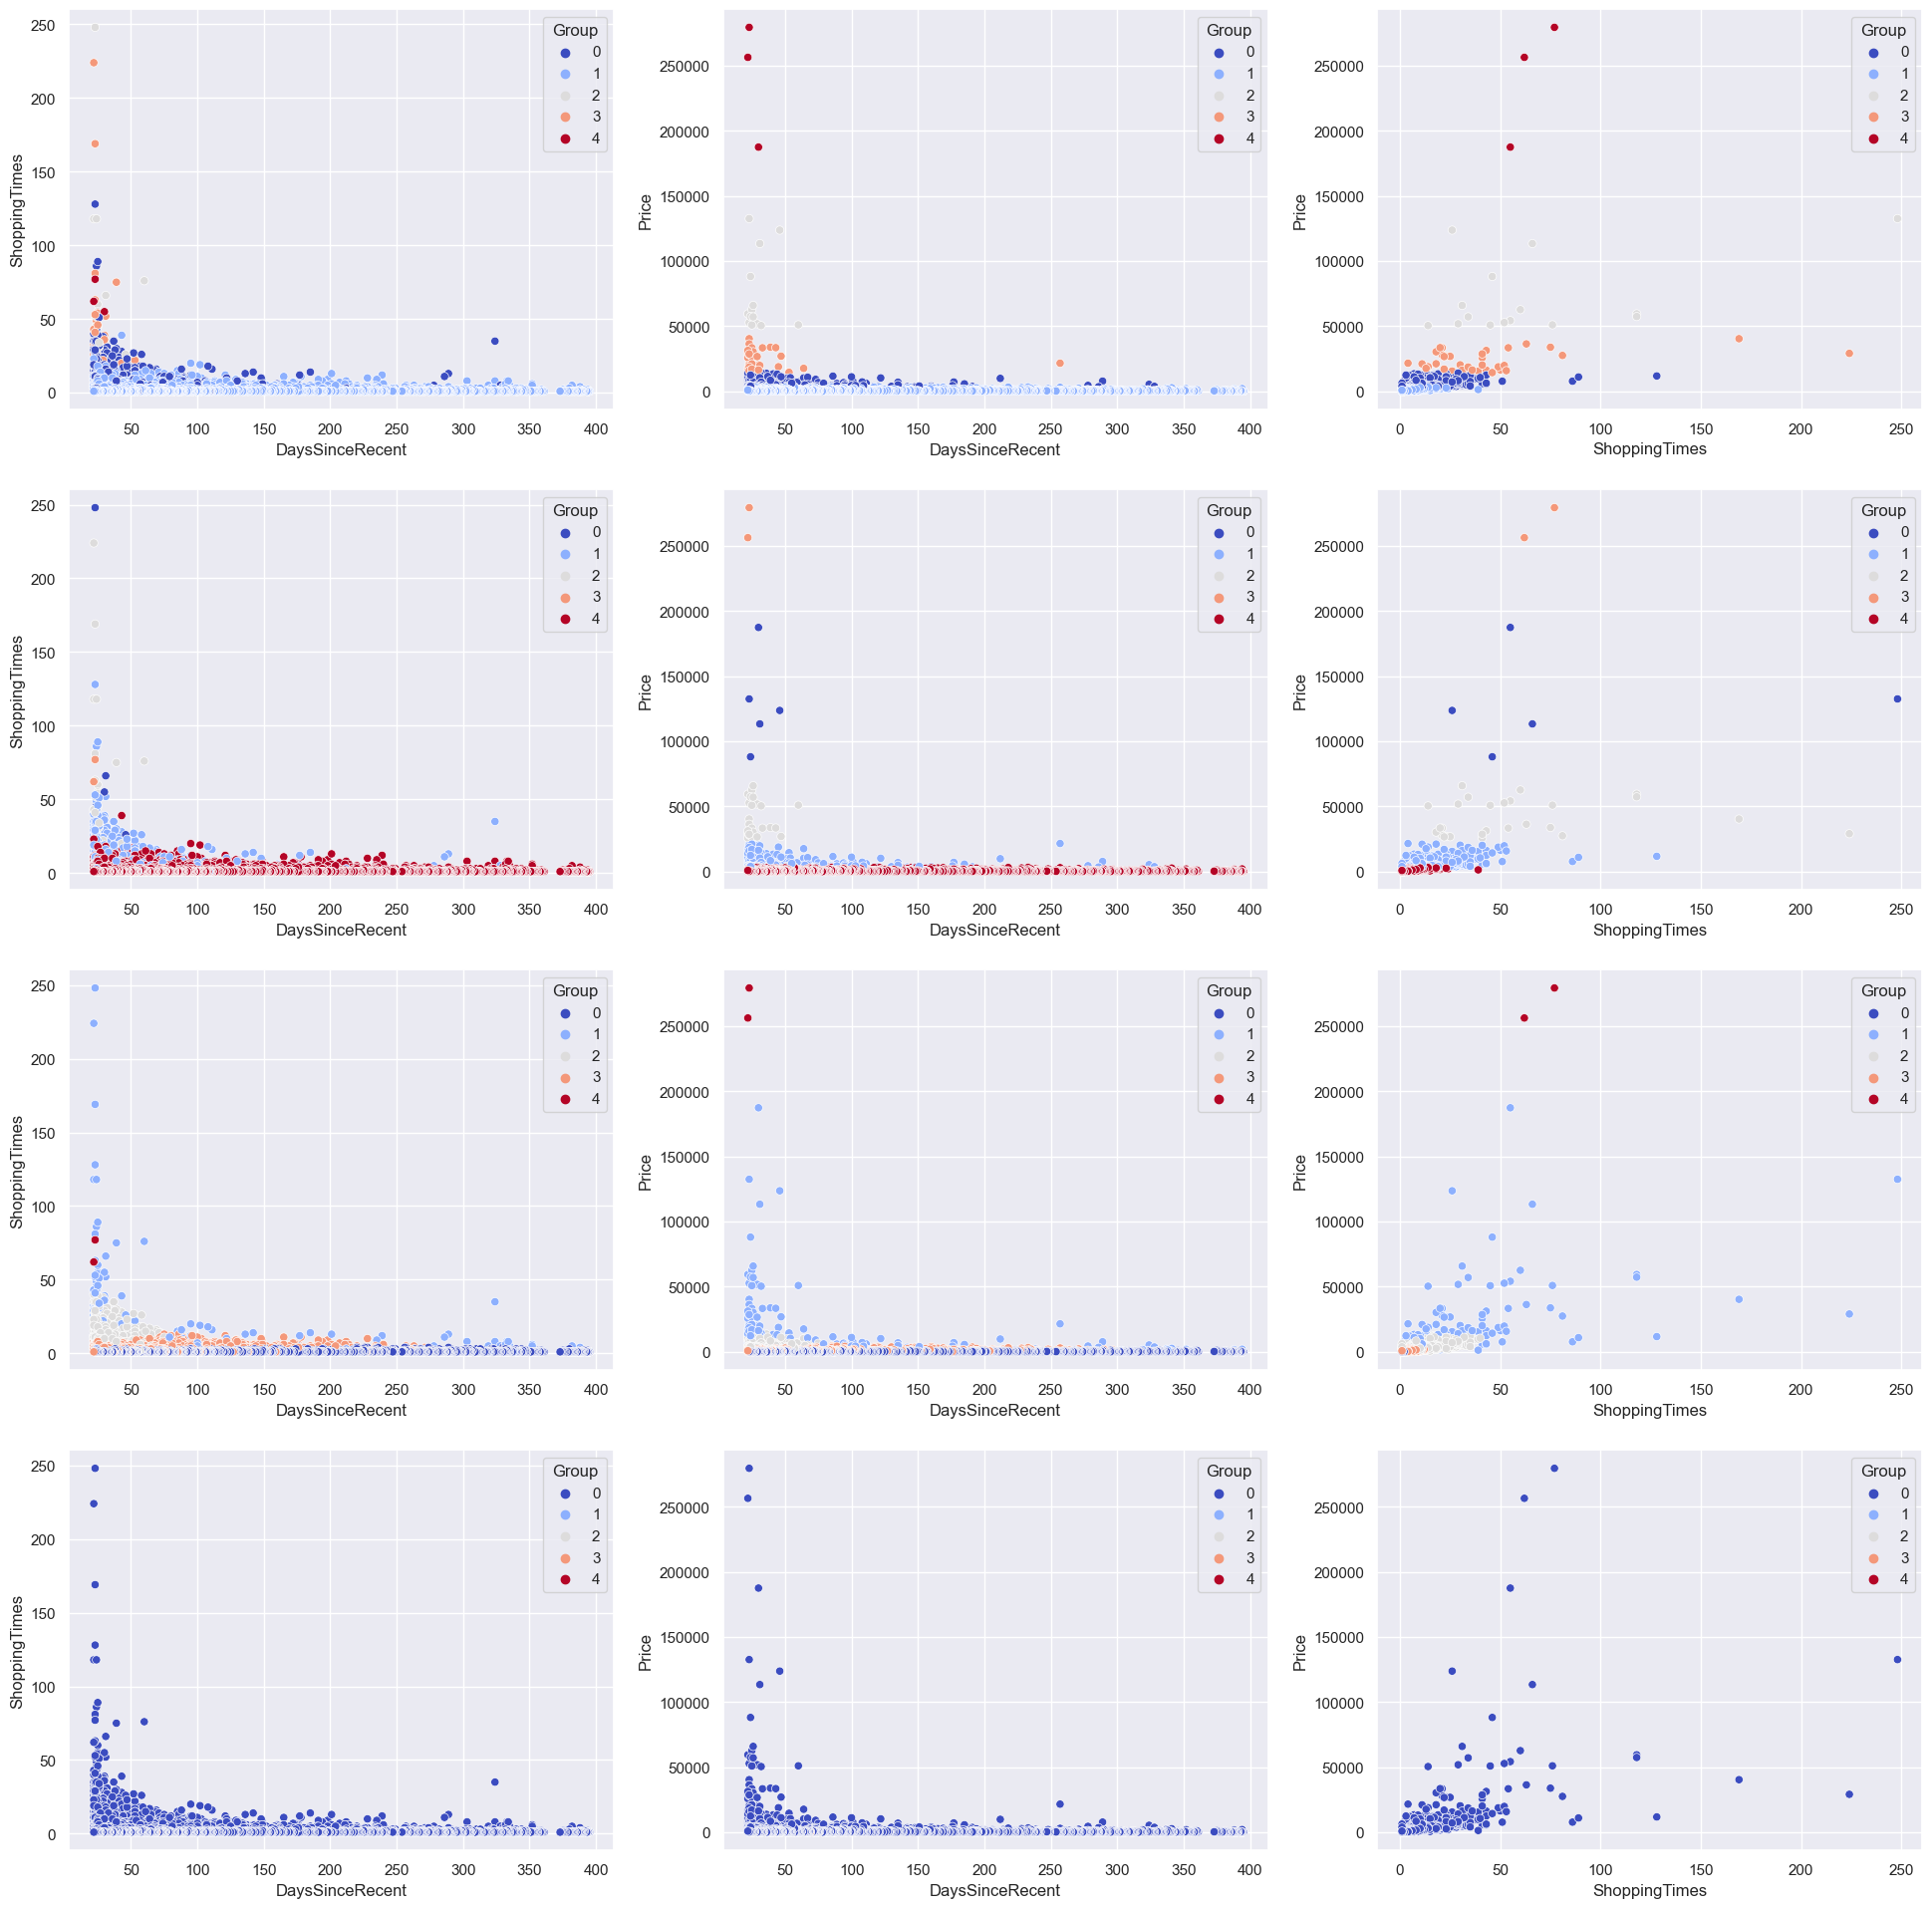

In [105]:
Xs = [X_km, X_hc, X_gm, X_dbscan]

sns.set()
figure, axes = plt.subplots(4, 3, figsize=(24, 24))

for i in range(len(models)):
    sns.scatterplot(ax=axes[i, 0], data=Xs[i], x='DaysSinceRecent', y='ShoppingTimes', hue='Group', palette='coolwarm')
    sns.scatterplot(ax=axes[i, 1], data=Xs[i], x='DaysSinceRecent', y='Price', hue='Group', palette='coolwarm')
    sns.scatterplot(ax=axes[i, 2], data=Xs[i], x='ShoppingTimes', y='Price', hue='Group', palette='coolwarm')

In [107]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

df_model_eval = pd.DataFrame([[silhouette_score(X, Xs[i]['Group']), davies_bouldin_score(X, Xs[i]['Group'])] for i in range(len(Xs))], columns=['SilhouetteScore', 'DaviesBouldinScore'])
df_model_eval['Model'] = ['K-Means', 'Agglomerative Clustering', 'Gaussian Mixture', 'DBSCAN']
df_model_eval = df_model_eval[['Model', 'SilhouetteScore', 'DaviesBouldinScore']]

df_model_eval

,Model,SilhouetteScore,DaviesBouldinScore
0,K-Means,0.771781,0.518273
1,Agglomerative Clustering,0.782716,0.452121
2,Gaussian Mixture,0.355295,0.873804
3,DBSCAN,-0.625131,1.258069
